In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.analysis.diffraction.xrd import *
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
mp_key = "nPJf5FFhl6DXPpC4NQSxAL5REFwR0nb0" #C'est le clé api de materials project personnel
mp_id = "mp-23040"

In [3]:
with MPRester(mp_key) as m:
    #Structure du matériau
    #struct = m.get_structure_by_material_id(mp_id) 
    #struct_prim = m.get_structure_by_material_id(mp_id)
    #conv_struct = SpacegroupAnalyzer(struct_prim).get_conventional_standard_structure()
    
    #ops_sym = SpacegroupAnalyzer(conv_struct).get_space_group_operations() #Symétries
    
    #el_bs = m.get_bandstructure_by_material_id(mp_id) #Bandes électroniques
    #el_dos = m.get_dos_by_material_id(mp_id) #Densité électronique
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id) #Bande de phonons
    
    #analyse = SpacegroupAnalyzer(struct) #Analyseur


Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure de bande de phonons et zone de Brillouin du $Ca_{2}PI$

Bandes acoustiques/optiques et zone de Brillouin:


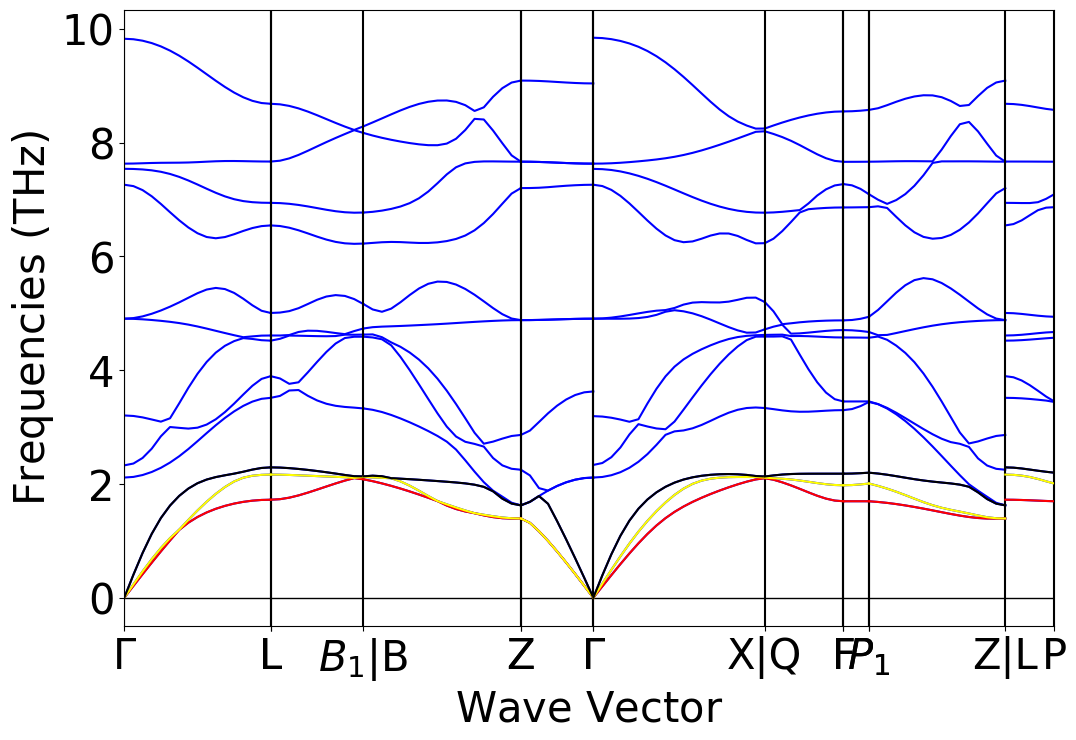

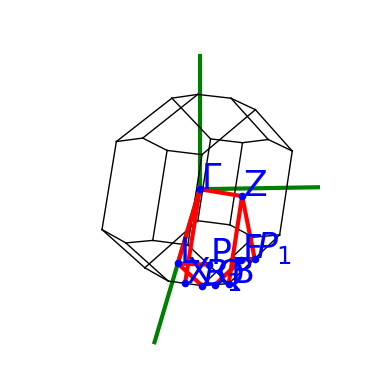

In [4]:
plot_bs = get_plot_bs(ph_bs)
#plot_bs.show() #COMMENTER QUAND FINI, contient trop d'infos, utile pour obtenir ID-s des bandes

bandes = PhononBSPlotter(ph_bs)
data = bandes.bs_plot_data()
plot_bandes = bandes.get_plot() 

distances = data["distances"] #[A°] (armstrong)
A = 10**-10 #A -> m
frequency = data["frequency"] #[THz]
THz = 10**12 #THz -> Hz
pi = np.pi
#print(len(distances)) # = 9 = nombre de bandes acoustiques et optiques en total

print("Bandes acoustiques/optiques et zone de Brillouin:")

for i in range(len(distances)): #3 premiers branches acoustiques
    plt.plot(distances[i], frequency[i][0], color = "red") #direction[0]
    plt.plot(distances[i], frequency[i][1], color = "yellow") #direction[3]
    plt.plot(distances[i], frequency[i][2], color = "black") #direction[4]

bandes.plot_brillouin() #comment rendre plus claire? (Bien meme que sur materials project)

## Calcul vitesse du son

Théorie:

La vitesse du son dans un matériau est défini come la vitesse de propagation d'un phonon dans un matériau n'est pas une propriété isotrope dans beaucoup de matériau, $Ca_2PI$ en étant un d'eux.

Les branches acoustiques sont les branches associées à des vibrations de phonons basses dans la zone de Brillouin caractérisées par une évolution linéaire à des fréquences tendants vers zéro, avec la vitesse de propagation du son dans un matériau défini comme: $ v_{son}=\frac{d\omega}{dq}|_{w\mapsto 0}$ : la pente de ces branches acoustiques lorsque fréqence tends vers zéro.

($w = 2\pi f$)

Les trois directions différents de la zone de Brillouin qu'on va étudier: 

Branche 1: $\Gamma \rightarrow X$

Branche 2: $K \rightarrow \Gamma$

Branche 3: $\Gamma \rightarrow L$

In [5]:
#print("distances:")
#for i in range(len(distances)):
#    print(i)
#    print(distances[i])

#print("fequency:")
#for i in range(len(frequency)):
#    print(i)
#    print(frequency[i])

#### Branche acoustique 1

In [7]:
f = frequency[0][0] #trouver directions associes aux differents branches => faire des prints
k = distances[0]

#pas oublier de aller de frequence (f) à pulsation (w) et f en [THz], convertir en Hz!!
#df =        f[len(k)-1] - f[len(k)-1-2] #frequence dernier-2 avant dernier pour df
#dw = 2 * pi * THz * df #convertir df en dw
#dk = 1/A * (k[len(k)-1] - k[len(k)-1-2]) #dk en [m]

#print(f)
#print(k)
#indices: 1,0 car on part de indice 0 vers max: Gamma -> X

#pas oublier de aller de frequence (f) à pulsation (w) et f en [THz], convertir en Hz!!
df =        f[1] - f[0] #frequence dernier-2 avant dernier pour df
dw = 2 * pi * THz * df #convertir df en dw
dk = 1/A * (k[1] - k[0]) #dk en [m]

v = dw/dk

print("Vitesse de propagation du son pour la branche 1 selon Gamma - X: v = ", np.abs(v) ,"[m/s]")

Vitesse de propagation du son pour la branche 1 selon Gamma - X: v =  2407.254419371152 [m/s]


#### Branche acoustique 2

In [8]:
f = frequency[3][1] #trouver directions associes aux differents branches => faire des prints
k = distances[3]

#pas oublier de aller de frequence (f) à pulsation (w) et f en [THz], convertir en Hz!!
#df =        f[len(k)-1] - f[len(k)-1-2] #frequence dernier-2 avant dernier pour df
#dw = 2 * pi * THz * df #convertir df en dw
#dk = 1/A * (k[len(k)-1] - k[len(k)-1-2]) #dk en [m]

#print(f)
#print(k)
#indices: -2,-1 car on part de indice max vers 0: K -> Gamma

#pas oublier de aller de frequence (f) à pulsation (w) et f en [THz], convertir en Hz!!
df =        f[-2] - f[-1] #frequence dernier-2 avant dernier pour df
dw = 2 * pi * THz * df #convertir df en dw
dk = 1/A * (k[-2] - k[-1]) #dk en [m]

v = dw/dk

print("Vitesse de propagation du son pour la branche 2 selon K - Gamma: v = ", np.abs(v) ,"[m/s]")

Vitesse de propagation du son pour la branche 2 selon K - Gamma: v =  2454.646433163485 [m/s]


#### Branche acoustique 3

In [10]:
w = frequency[4][2] #trouver directions associes aux differents branches => faire des prints
k = distances[4]

#pas oublier de aller de frequence (f) à pulsation (w) et f en [THz], convertir en Hz!!
#df =        f[len(k)-1] - f[len(k)-1-2] #frequence dernier-2 avant dernier pour df
#dw = 2 * pi * THz * df #convertir df en dw
#dk = 1/A * (k[len(k)-1] - k[len(k)-1-2]) #dk en [m]

#print(f)
#print(k)
#indices: 1,0 car on part de indice 0 vers max: Gamma -> L

#pas oublier de aller de frequence (f) à pulsation (w) et f en [THz], convertir en Hz!!
df =        f[1] - f[0] #frequence dernier-2 avant dernier pour df
dw = 2 * pi * THz * df #convertir df en dw
dk = 1/A * (k[1] - k[0]) #dk en [m]

v = dw/dk

print("Vitesse de propagation du son pour la branche 3 selon Gamma - L: v = ", np.abs(v) ,"[m/s]")

Vitesse de propagation du son pour la branche 3 selon Gamma - L: v =  901.0122018127573 [m/s]
